Importation of Libraries

PREPROCESSING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Customer churn refers to the loss of customers or subscribers for any reason at all

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




Reading the csv file

In [3]:
churn_file=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CustomerChurn_dataset.csv')
churn_file

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes




Exploratory Data Analysis

In [4]:
#Checking if there is any null values
churn_file.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
churn_file.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Identify columns that can be converted to float

df = pd.DataFrame(churn_file)
columns_to_convert = []

for col in df.columns:
    try:
        df[col].astype(float)
        columns_to_convert.append(col)
    except ValueError:
        pass
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Dropping useless columns; customerID in this case
df = df.drop('customerID', axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
#Totalcharge is object instead of float.
#Converting non-numeric values to numeric values.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# Fill NaN values with the mean

mean_total_charges = df['TotalCharges'].mean()
df['TotalCharges'] = df['TotalCharges'].fillna(mean_total_charges)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


converts categorical variables into a numerical

Encoding

In [9]:
# Get columns that are numeric
numeric_columns = ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'tenure']

# Assuming 'churn_file' is your DataFrame
columns_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                     'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# Encoding the non-numeric attributes
for column in columns_to_encode:
    df[column], _ = pd.factorize(df[column])

# Display the resulting DataFrame
df


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.90,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.60,1


Finding correlation

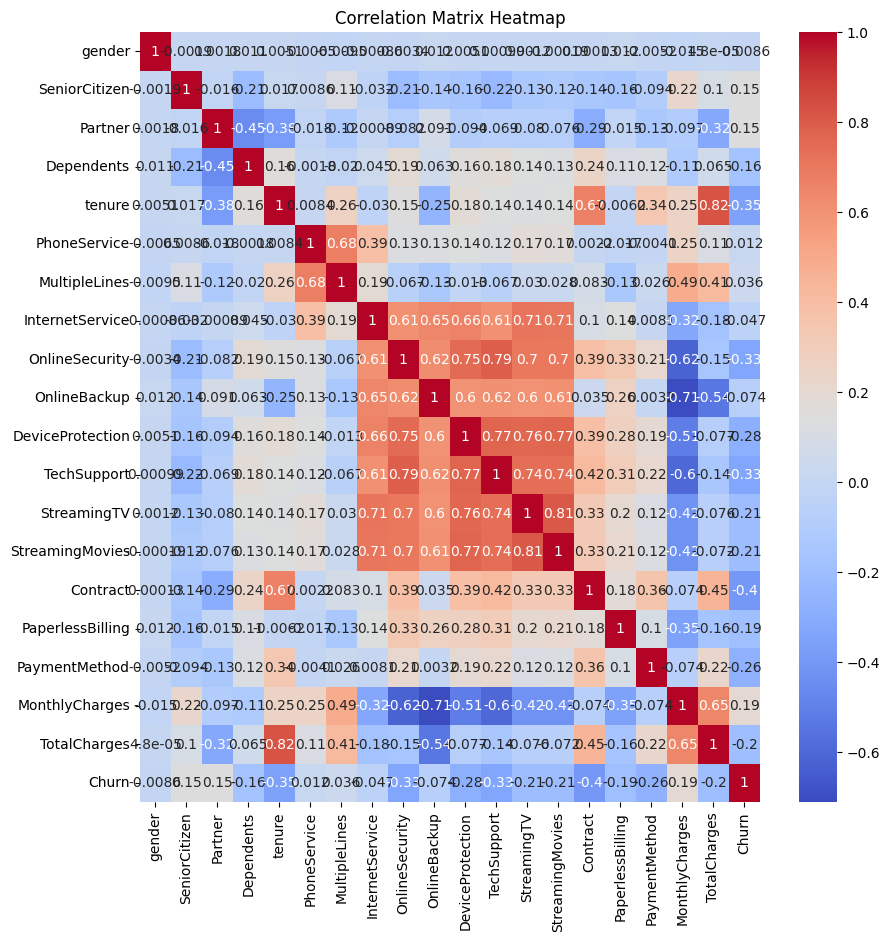

In [10]:
#Finidng correlation
correlation_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [11]:
# Specify the features
features = df.columns
features


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Extracting a highly correlated columns

In [12]:
# Find highly correlated variables
highly_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.5 :
            colname = correlation_matrix.columns[i]
            highly_corr.add(colname)

# Remove one of the highly correlated variables
if len(highly_corr) > 0:
    variable_to_remove = list(highly_corr)[0]
    new_Data = df.drop(columns=[variable_to_remove])
    print(f"Removed variable: {variable_to_remove}")

new_Data

Removed variable: TechSupport


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,1,1,1,56.95,1889.50,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,0,1,84.80,1990.50,0
7039,0,0,0,1,72,1,2,1,0,0,1,1,1,1,0,3,103.20,7362.90,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,1,74.40,306.60,1


Relevant Features


Visualization with histogram

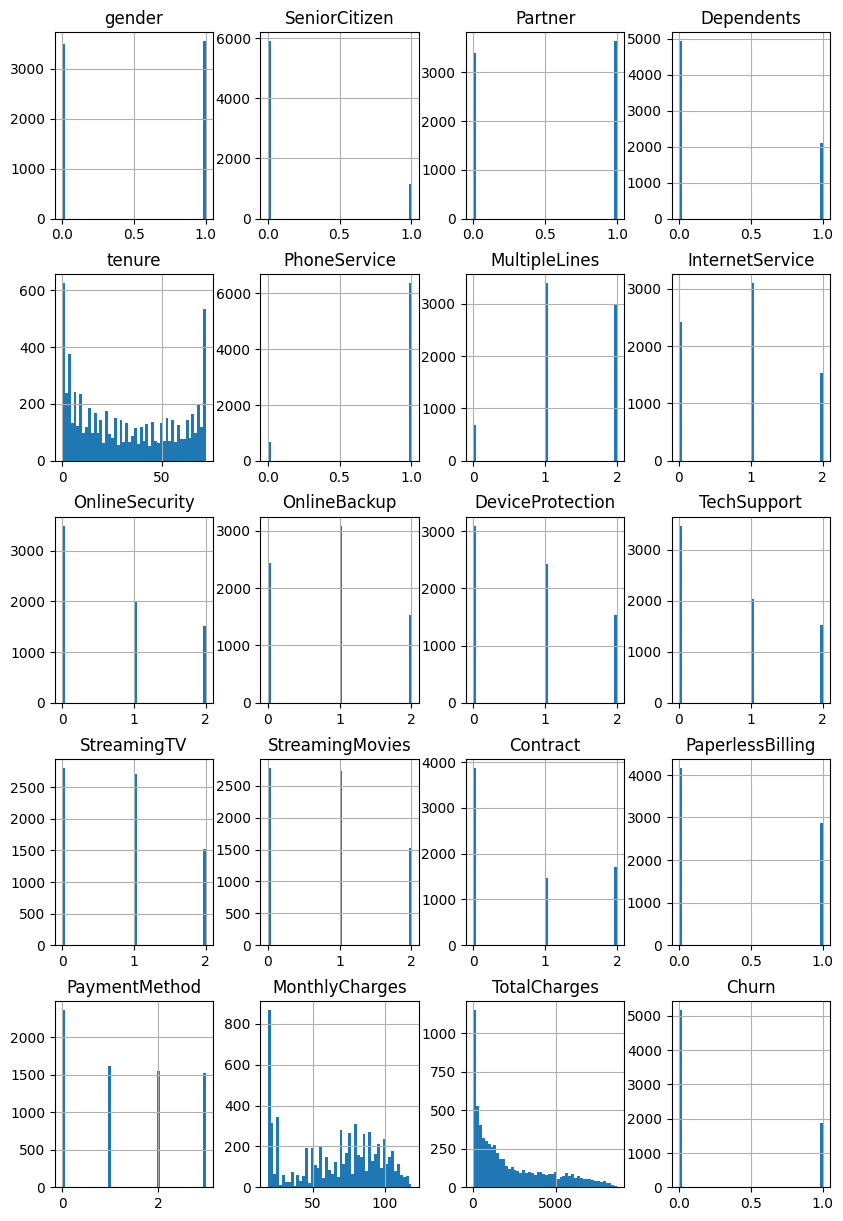

In [13]:
#Visualization
#Histogram for the housing data
df.hist(bins=50, figsize=(10, 15))
plt.show()



In [14]:
df = df.dropna()


Training an MLP using features from (1) with cross validation and GridSearchCV

In [15]:
# Separating the dependend and independent datasets

y_values = df['Churn']
x_values = df.drop('Churn', axis = 1)

columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

x_value = x_values.drop(columns=columns_to_scale)

X = df[columns_to_scale]

X.shape

(7043, 3)

In [16]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
'''columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train1 = X_train.drop(columns=columns_to_scale)
X_test1 = X_test.drop(columns=columns_to_scale)'''

X_scaled= scaler.fit_transform(X)
Final_X= pd.concat([X, x_value], axis=1)






independent column values

dependent values

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Final_X, y_values, test_size=0.2, random_state=42, stratify=y_values)


Creating a model

In [18]:
input_layer = Input(shape=(X_train.shape[1],))

hidden_layer_1 = Dense(128, activation='relu')(input_layer)
hidden_layer_2 = Dense(64, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(32, activation='relu')(hidden_layer_2)
hidden_layer_4 = Dense(8, activation='relu')(hidden_layer_3)

output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)

In [19]:
# Creating the model
model = Model(inputs=input_layer, outputs=output_layer)

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model using your training data
model.fit(X_train, y_train, epochs=10, batch_size=64)

# Evaluate the model on your test data
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/10
89/89 [==============================] - 1s 2ms/step - loss: 14.0557 - accuracy: 0.6471
Epoch 2/10
89/89 [==============================] - 0s 3ms/step - loss: 0.8117 - accuracy: 0.7313
Epoch 3/10
89/89 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.7394
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.6458 - accuracy: 0.7547
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.8421 - accuracy: 0.7373
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.7602 - accuracy: 0.7400
Epoch 7/10
89/89 [==============================] - 0s 3ms/step - loss: 0.9270 - accuracy: 0.7394
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.7535
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.5883 - accuracy: 0.7634
Epoch 10/10
45/45 [==============================] - 0s 2ms/step - loss: 2.2643 - accuracy: 0.4705


In [22]:
# Evaluate the model on your test data
loss, accuracy = model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 3ms/step - loss: 2.2643 - accuracy: 0.4705


In [23]:
# Evaluate the model on the test set
y_prediction = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_prediction)

auc_score


45/45 [==============================] - 0s 2ms/step


0.5371903174972229

In [24]:
# Displaying the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 19)]              0         
                                                                 
 dense (Dense)               (None, 128)               2560      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13169 (51.44 KB)
Trainable params: 13169 (51.44

In [25]:
#Using a functional API keras

# Create the Keras model
model = keras.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model using your training data
model.fit(X_train, y_train, epochs=15, batch_size=32)


# Predict probabilities on the test
y_pred_prob = model.predict(X_test)

#AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"AUC Score: {auc_score:.4f}")





Epoch 1/15
177/177 [==============================] - 2s 2ms/step - loss: 1.2683 - accuracy: 0.7410
Epoch 2/15
177/177 [==============================] - 0s 2ms/step - loss: 0.6916 - accuracy: 0.7567
Epoch 3/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5300 - accuracy: 0.7730
Epoch 4/15
177/177 [==============================] - 0s 2ms/step - loss: 0.8573 - accuracy: 0.7519
Epoch 5/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5350 - accuracy: 0.7755
Epoch 6/15
177/177 [==============================] - 0s 2ms/step - loss: 0.6409 - accuracy: 0.7639
Epoch 7/15
177/177 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7827
Epoch 8/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5167 - accuracy: 0.7769
Epoch 9/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7756
Epoch 10/15
177/177 [==============================] - 0s 2ms/step - loss: 0.5925 - accuracy: 0.7792

In [26]:
# Evaluate the model on your test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

45/45 [==============================] - 0s 2ms/step - loss: 0.4316 - accuracy: 0.7956
Test Loss: 0.4316
Test Accuracy: 0.7956


Testing the model

In [27]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


# Define the MLP model as a function
def multi_layer_perceptron(input_size, hidden_sizes, output_size):
    model = MLPClassifier(
        hidden_layer_sizes=hidden_sizes,
        activation='relu',
        max_iter=500
    )
    return model


input_size = 19
hidden_layers = (128,), (64,), (32,), (16,), (8,), (4,), (2,), (64, 32), (32, 16)
output_size = 19

# Define the hyperparameter grid for the grid search
param_grid = {
    'hidden_layer_sizes': [(128,), (64,), (32,), (16,), (8,), (4,), (2,), (64, 32), (32, 16)],
}

# Create the MLP model
mlp_model = multi_layer_perceptron(input_size, hidden_layers, output_size)

# Create the GridSearchCV object with AUC score as the scoring metric
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_mlp_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_proba = best_mlp_model.predict_proba(X_test)[:, 1]

# Evaluate the best model's AUC score on the test set
auc_score = roc_auc_score(y_test, y_pred_proba)

#final AUC score on the test set
print(auc_score)


0.8421349040274871


Saving the model

In [28]:
import pickle

# Save the model
with open('Customer_churning.pkl', 'wb') as file_name:
    pickle.dump(best_mlp_model, file_name)